In [5]:
#We will predict Whetehr a bank note is authentic or fake depending upon the four different attributes of the image
#of the note . the attributes are variance of wavelet , tranformed curtosis of the image , entropy and skewnwss of the image
#here all the attrinutes expect class are independant

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [7]:
#Importing the Dataset
bankdata=pd.read_csv("/Users/91709/Downloads/bill_authentication.csv")
bankdata.shape


(1372, 5)

In [8]:
bankdata.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


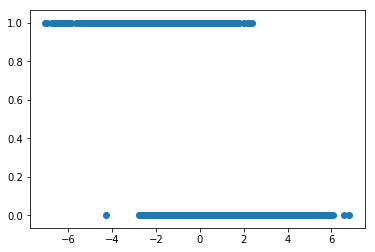

In [9]:
X=bankdata.drop('Class',axis=1)
y=bankdata['Class']

plt.scatter(bankdata['Variance'],bankdata['Class'])
#Here not only variance anything can be used

Class
0    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
1    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
dtype: object

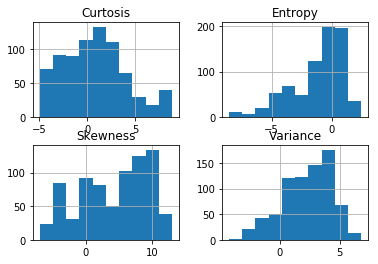

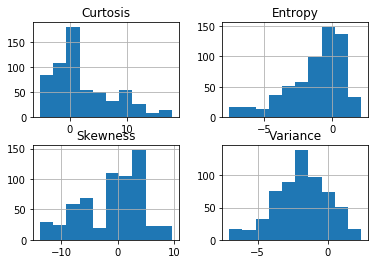

In [10]:
bankdata.groupby('Class').hist()
#Here we can see for the data the curtosis is more for the one which is authentic between -5 and 5 and less at 0 to 10 for the 
#one which is authentic over here the curtosis is less at 0 to 10 not properly distributed over here

In [11]:
#Test Train Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [12]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
X_test[0:5]

,Variance,Skewness,Curtosis,Entropy
457,0.64215,3.12870,4.29330,0.64696
311,5.02970,-4.97040,3.50250,-0.23751
777,-1.82150,2.75210,-0.72261,-2.35300
140,2.09110,0.94358,4.55120,1.23400
1151,-2.31420,-0.68494,1.98330,-0.44829


In [14]:
y_pred=classifier.predict(X_test)
y_pred[0:5]

array([0, 0, 1, 0, 1], dtype=int64)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[143   2]
 [  2 128]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       145
           1       0.98      0.98      0.98       130

   micro avg       0.99      0.99      0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [17]:
#In the command prompt  we have to go to anaconda prompt in the search option and get it done over here
#we have to 
#(base) C:\Users\91709>conda install python-graphviz
#WARNING: The conda.compat module is deprecated and will be removed in a future release.


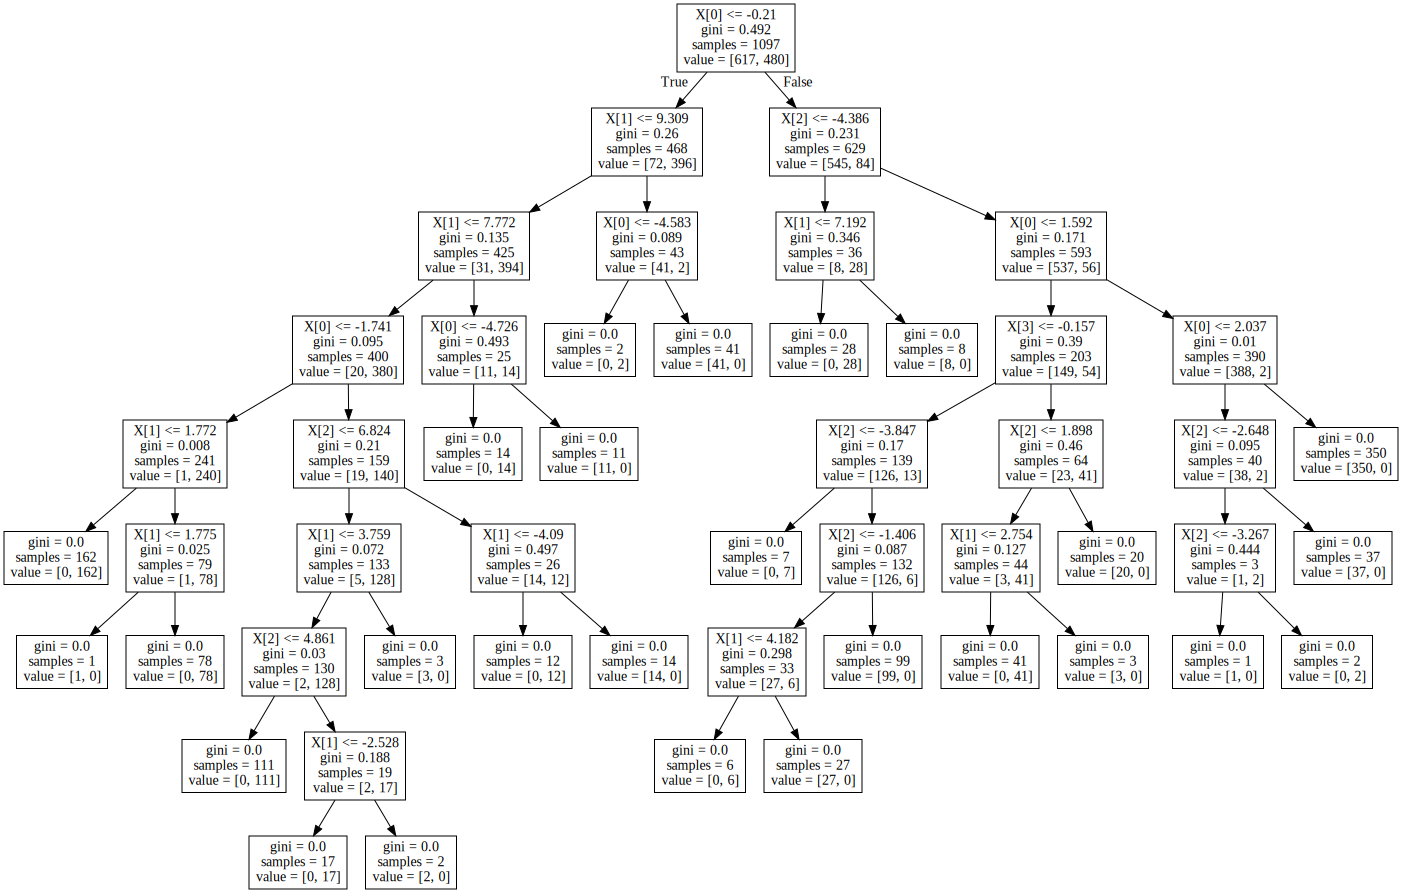

In [21]:
import os
os.environ["PATH"] += os.pathsep + 'C:\\Users\\91709\\Anaconda3\\Library\\bin\\graphviz'

import graphviz
from sklearn import tree
dot_data=tree.export_graphviz(classifier,out_file=None)
graph=graphviz.Source(dot_data)
graph

In [25]:
#The above graph shows 